# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [3]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)


## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [4]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## IMDB 데이터 적용

### 데이터 로드

In [7]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

num_words = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))


# 길이 맞춰주기 위해서 pad_sequences 사용
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [8]:
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [10]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - acc: 0.5376 - loss: 0.6857 - val_acc: 0.7774 - val_loss: 0.4932
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.7957 - loss: 0.4561 - val_acc: 0.8434 - val_loss: 0.3787
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.8601 - loss: 0.3360 - val_acc: 0.8504 - val_loss: 0.3550
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.8943 - loss: 0.2699 - val_acc: 0.8482 - val_loss: 0.3887
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - acc: 0.9161 - loss: 0.2180 - val_acc: 0.8176 - val_loss: 0.4120
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.9450 - loss: 0.1570 - val_acc: 0.8226 - val_loss: 0.4278
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - acc: 0.9616 - loss: 0.1162 - val_acc: 0.8510 - val_loss: 0.4276
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - acc: 0.9773 - loss: 0.0710 - val_acc: 0.7882 - val_loss: 0.5821
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/

### 시각화

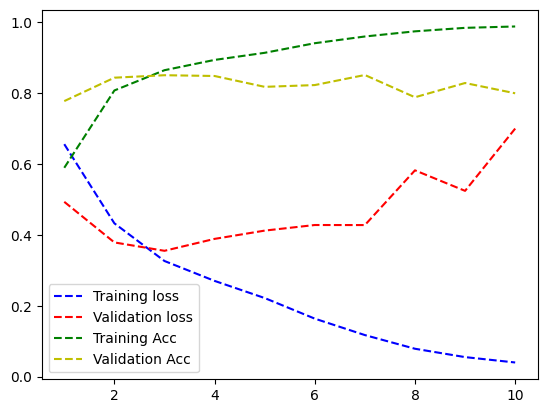

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.plot(epochs, acc, 'g--', label='Training Acc')
plt.plot(epochs, val_acc, 'y--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

In [12]:
model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.7946 - loss: 0.7250


[0.7202646136283875, 0.7951200008392334]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 데이터셋 로드

In [15]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(8982,)
(2246,)
(8982,)
(2246,)


### 데이터 전처리 및 확인

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500

pad_x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
pad_x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(len(pad_x_train[0]))

500


In [17]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

# 다중분류 이므로 softmax, sparse_categorical_crossentropy로 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [19]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - acc: 0.3327 - loss: 2.8823 - val_acc: 0.4786 - val_loss: 2.1669
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - acc: 0.4940 - loss: 2.0733 - val_acc: 0.4569 - val_loss: 1.9750
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - acc: 0.5387 - loss: 1.7672 - val_acc: 0.5799 - val_loss: 1.6461
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - acc: 0.6164 - loss: 1.5369 - val_acc: 0.6093 - val_loss: 1.5464
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - acc: 0.6563 - loss: 1.3881 - val_acc: 0.6277 - val_loss: 1.4966
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - acc: 0.6909 - loss: 1.2199 - val_acc: 0.6238 - val_loss: 1.4856
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - acc: 0.7432 - loss: 1.0274 - val_acc: 0.6644 - val_loss: 1.3764
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - acc: 0.7831 - loss: 0.8965 - val_acc: 0.6884 - val_loss: 1.3413
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 

### 시각화

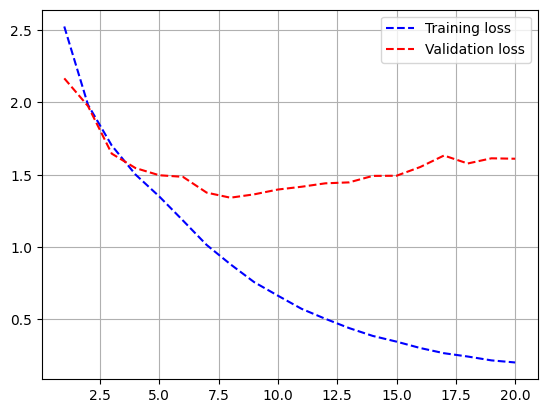

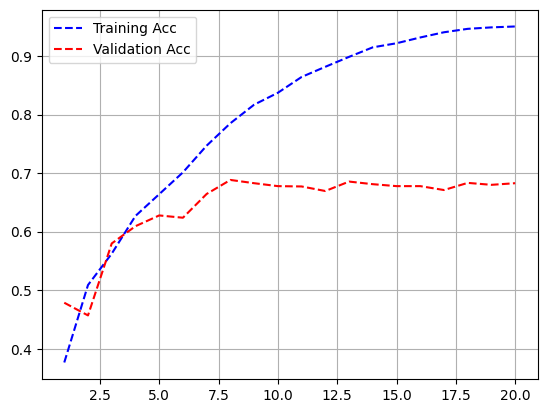

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [21]:
model.evaluate(pad_x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.6746 - loss: 1.7382


[1.775712490081787, 0.6674087047576904]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

num_words = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
pad_x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)
print(x_test.shape)

25000
25000
(25000,)
(25000,)


### 모델 구성

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [24]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - acc: 0.5851 - loss: 0.6641 - val_acc: 0.7060 - val_loss: 0.5739
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - acc: 0.8117 - loss: 0.4260 - val_acc: 0.8236 - val_loss: 0.4010
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - acc: 0.8660 - loss: 0.3233 - val_acc: 0.8720 - val_loss: 0.3160
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - acc: 0.8745 - loss: 0.3097 - val_acc: 0.8300 - val_loss: 0.4056
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - acc: 0.8970 - loss: 0.2601 - val_acc: 0.8708 - val_loss: 0.3086
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - acc: 0.9080 - loss: 0.2436 - val_acc: 0.8560 - val_loss: 0.3296
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - acc: 0.9118 - loss: 0.2282 - val_acc: 0.8418 - val_loss: 0.4073
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - acc: 0.9157 - loss: 0.2276 - val_acc: 0.8750 - val_loss: 0.3225
Epoch 9/10
157/157 ━━━━━━━━━━━━━

### 시각화

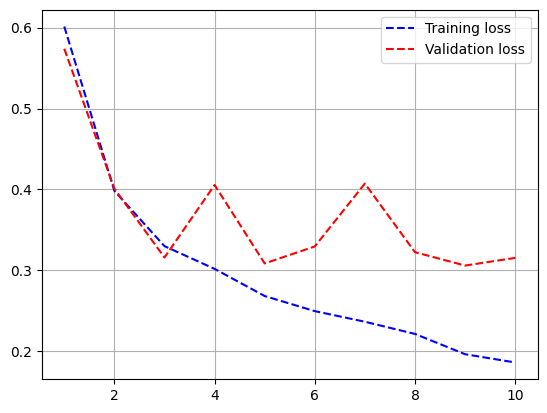

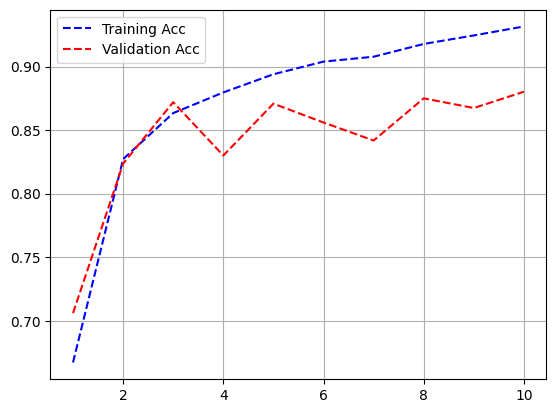

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()
plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [27]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.8774 - loss: 0.3236


[0.3219340741634369, 0.8765199780464172]

# Cosine 함수를 이용한 순환 신경망

In [28]:
import numpy as np

np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time % 30)/ 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time)+ np.random.random(361))


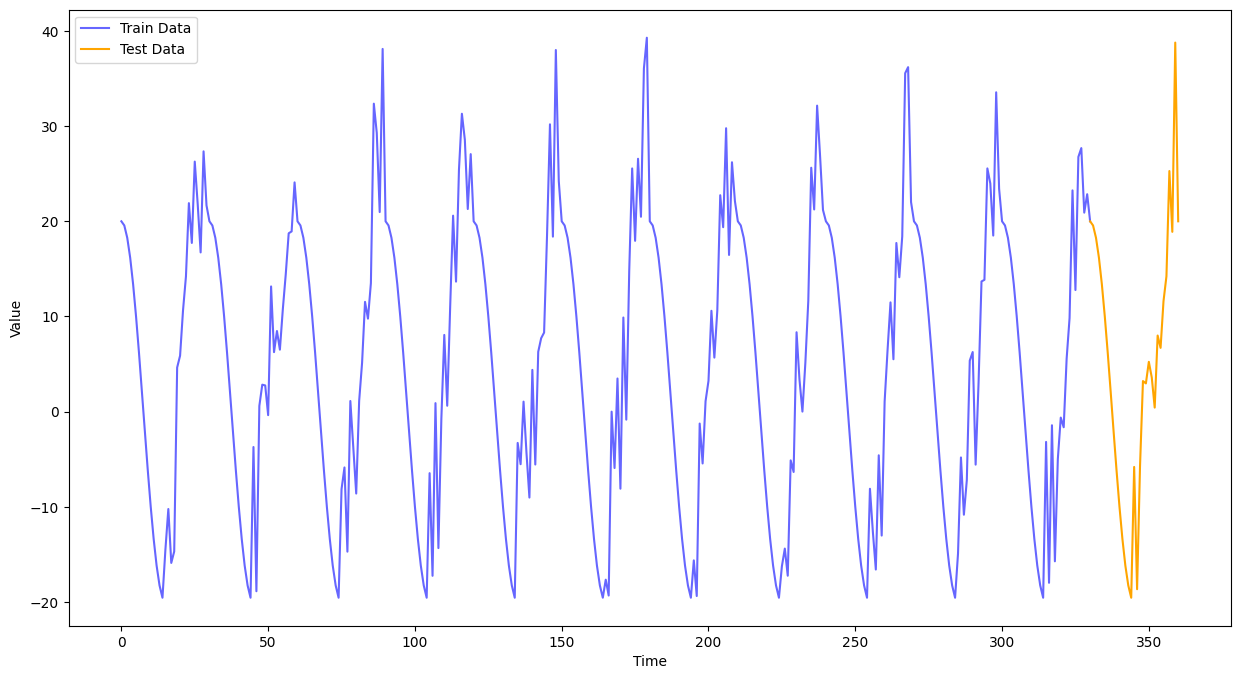

In [29]:
plt.figure(figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color='blue', alpha=0.6, label='Train Data')
plt.plot(np.arange(30*11, 30*12+1),
         time_series[30*11:],
         color='orange',  label='Test Data')
plt.legend()
plt.show()


### 데이터 전처리

In [61]:
def make_data(time_series, n):
    x_train_full, y_train_full = [], []

    for i in range(len(time_series)):
        if i + n < len(time_series):
            x_train_full.append(time_series[i:i+n])
            y_train_full.append(time_series[i+n])
        else:
          break

    x_train_full = np.array(x_train_full)
    y_train_full = np.array(y_train_full)

    return x_train_full, y_train_full

In [62]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [63]:
x_tarin_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1,1)

print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351, 1)


## 테스트 데이터셋 생성

In [64]:
x_train = x_tarin_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_tarin_full[30*11:]
y_test = y_train_full[30*11:]

In [65]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [66]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [36]:
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential


def build_model(n):
    model = Sequential()
    model.add(SimpleRNN(32, activation='tanh', input_shape=(n, 1)))
    model.add(Dense(1))

	# 얼마나 잘 예측하는지! -> mse 설정
    model.compile(optimizer='adam', loss='mse')

    return model

In [37]:
model = build_model(10)
model.summary()

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

In [38]:
model.fit(x_train, y_train,
          epochs=100,
          batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 245.1084 
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 207.2470
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 173.6445
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 177.2280
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 139.4139
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 133.7310
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 100.3369
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 101.8787
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 87.1921
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 85.9875
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 85.5315
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 75.1728
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 69.1214
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 62.6576
Epoch 15/100
28/28 ━

## 예측값 그려보기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


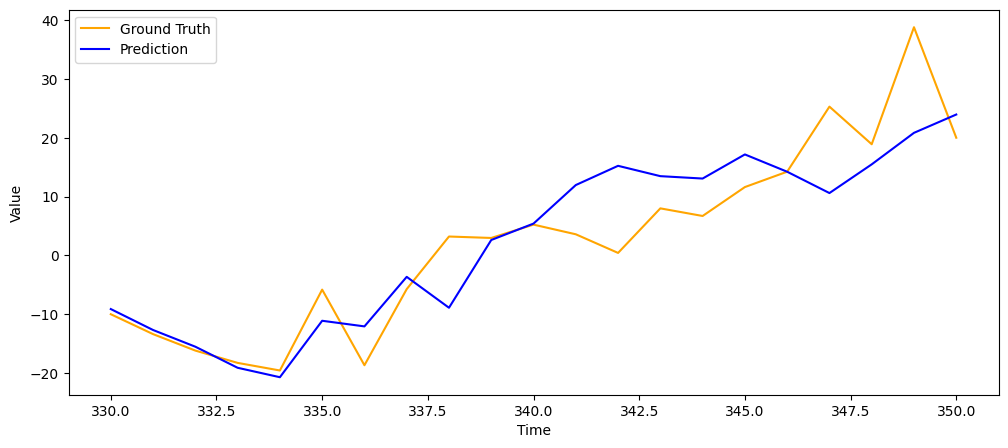

In [39]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='blue', label='Prediction')
plt.legend()
plt.show()



## 모델 재구성 (2)
- LSTM 사용

In [40]:
from tensorflow.keras.layers import LSTM

def build_model(n):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(n, 1)))
    model.add(LSTM(32))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

In [41]:
model2 = build_model(20)
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 재학습 및 예측값 그려보기

In [42]:
model2.fit(x_train, y_train,
          epochs=100,
          batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210.0509  
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.5670
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 129.3296
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.7530
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.3328
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.5570
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6464
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.4681
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.5266
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.8950
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7538
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.7587
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.8996
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.4335
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


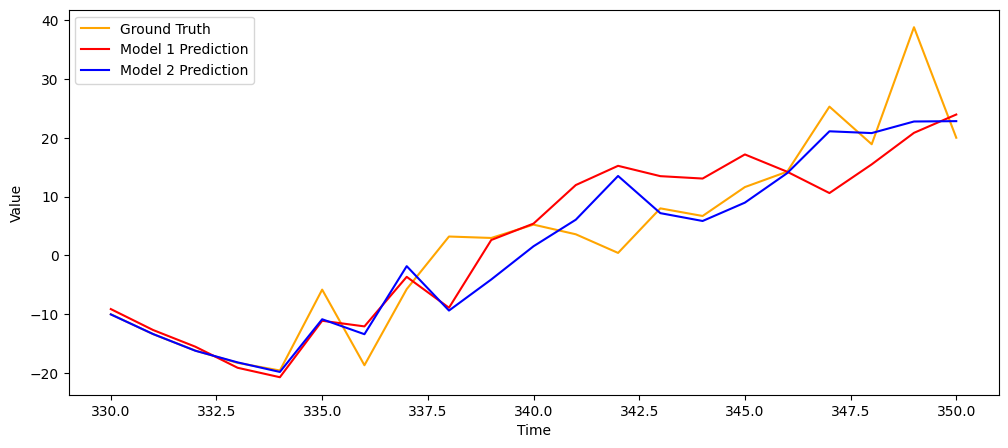

In [43]:
prediction2 = model2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction2))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='red', label='Model 1 Prediction')
plt.plot(pred_range, prediction2.flatten(), color='blue', label='Model 2 Prediction')
plt.legend()
plt.show()



## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [58]:
from tensorflow.keras.layers import GRU

def build_model(n):
    model = Sequential()
    model.add(GRU(30, return_sequences=True, input_shape=(n, 1)))
    model.add(GRU(30))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

model3 = build_model(10)
model3.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_17 (GRU)                    │ (None, 10, 30)         │         2,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_18 (GRU)                    │ (None, 10, 30)         │         5,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 10, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_20 (GRU)                    │ (None, 16)             │         3,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,935 (120.84 KB)

 Trainable params: 30,935 (120.84 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 재학습 및 예측값 그려보기

In [45]:
model3.fit(x_train, y_train,
           epochs=100,
           batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 216.9523  
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166.5976
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127.3222
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.1432
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.2628
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.0371
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.6397
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.0890
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.2392
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.8893
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.5932
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.7011
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.3382
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.2230
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


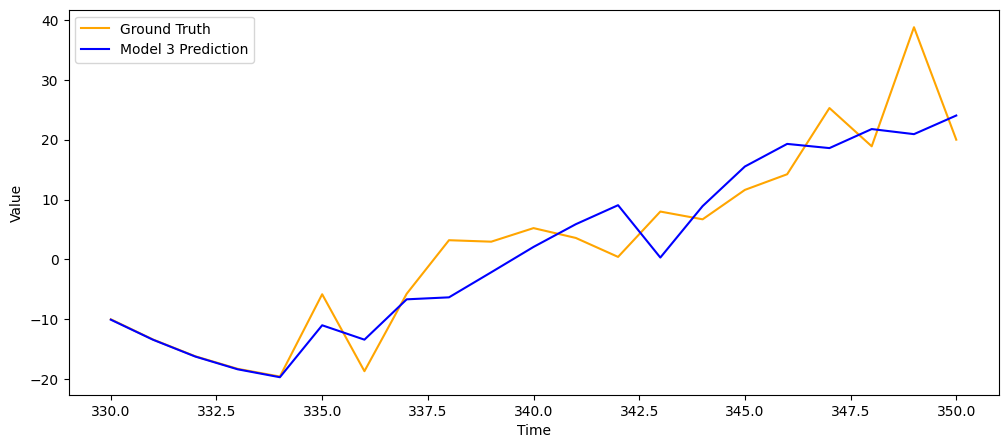

In [46]:
prediction3 = model3.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction2))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction3.flatten(), color='blue', label='Model 3 Prediction')
plt.legend()
plt.show()



In [59]:
from tensorflow.keras.layers import GRU

def build_model(n):
	model = Sequential()
	model.add(GRU(30, return_sequences=True, input_shape=(n, 1)))
	model.add(GRU(30, return_sequences=True))
	model.add(GRU(64, return_sequences=True))
	model.add(GRU(16))
	model.add(Dense(1))

	model.compile(optimizer='adam', loss='mse')

	return model

model4 = build_model(10)
model4.summary()

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_21 (GRU)                    │ (None, 10, 30)         │         2,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_22 (GRU)                    │ (None, 10, 30)         │         5,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_23 (GRU)                    │ (None, 10, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_24 (GRU)                    │ (None, 16)             │         3,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,935 (120.84 KB)

 Trainable params: 30,935 (120.84 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model4.fit(x_train, y_train,
           epochs=100,
           batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 215.7213
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.3286
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.2710
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 117.6856
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 112.3168
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.2360
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.4494
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 99.7179 
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91.2242
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.6741
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.5660
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.9659
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.1649
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9642
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


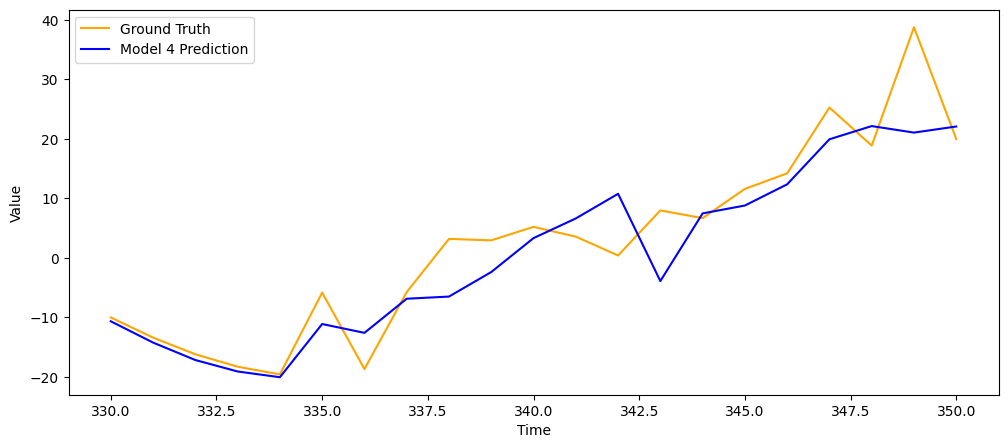

In [69]:
prediction4 = model4.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction2))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction4.flatten(), color='blue', label='Model 4 Prediction')
plt.legend()
plt.show()



# Conv1D

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlobalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [70]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

num_words = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

pad_x_train = pad_sequences(input_train, maxlen=maxlen)
pad_x_test = pad_sequences(input_test, maxlen=maxlen)

print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [71]:
def build_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32,
                        input_length=maxlen))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    return model

In [72]:
model = build_model()
model.summary()

/Users/vin_ah/miniconda3/envs/new_env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [73]:
history = model.fit(pad_x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=.2)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.5556 - loss: 0.6764 - val_acc: 0.7990 - val_loss: 0.4597
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.8165 - loss: 0.4173 - val_acc: 0.8270 - val_loss: 0.3812
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.8728 - loss: 0.3072 - val_acc: 0.8518 - val_loss: 0.3469
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.9026 - loss: 0.2442 - val_acc: 0.8644 - val_loss: 0.3263
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9259 - loss: 0.1971 - val_acc: 0.8500 - val_loss: 0.3696
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc: 0.9383 - loss: 0.1674 - val_acc: 0.8662 - val_loss: 0.3526
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc: 0.9481 - loss: 0.1443 - val_acc: 0.8524 - val_loss: 0.4160
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - acc: 0.9632 - loss: 0.1123 - val_acc: 0.8660 - val_loss: 0.3693
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/

### 시각화

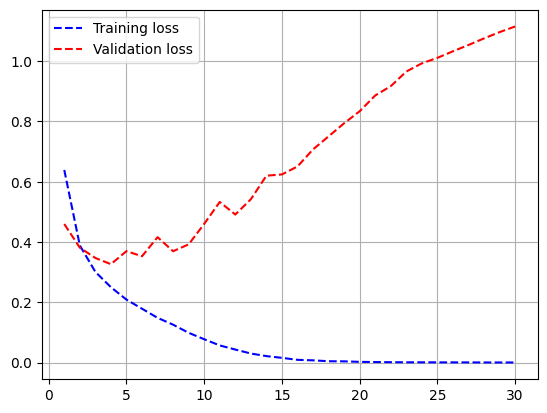

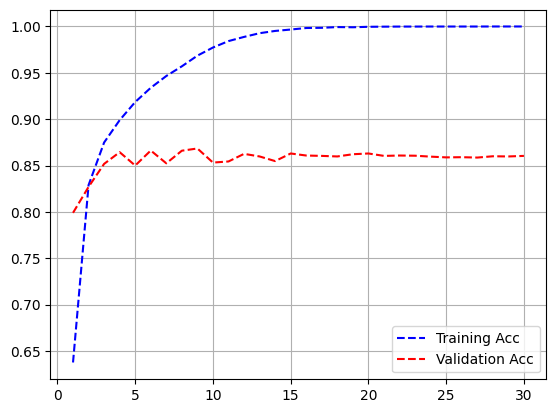

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()
plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음

In [75]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8441 - loss: 1.2136


[1.2004623413085938, 0.8461999893188477]